In [1]:
import numpy as np
import pandas as pd
from IPython.display import clear_output
from matplotlib import pyplot as plt
import tensorflow as tf
import os
import logging
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.utils import shuffle
import keras_tuner as kt
from tensorflow import keras

In [34]:
cwd = os.getcwd()
logger = logging.getLogger(__name__)
logging.basicConfig(filename = cwd + "\\Iris Logs.log", level=logging.INFO, format='%(asctime)s; %(levelname)s: %(message)s')


#directory = "C:\\Users\\kanka\\Downloads\\"
#os.chdir(directory)  #set directory path

In [163]:
def openDataset():
    """Get file name from user"""
    print("Enter the name of the dataset (with extension) stored at: ", cwd)
    location = input("Enter file name of the Iris dataset from https://archive.ics.uci.edu/ml/machine-learning-databases/iris/ \n")
    return location

In [36]:
flag_1 = 0
while flag_1 == 0:
    try:
        data = cwd + "\\" + str(openDataset())
        dfdata = pd.read_csv(data, delimiter = ",", sep = "\n", names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"])
        logger.info(f"Accessed the file {data} as the dataset")
        flag_1 = 1
    except:
        print(f"The name of the file {data} is invalid")
        pass
dfdata.head() #check if dataset is imported correctly

Enter the name of the dataset (with extension) stored at:  C:\Users\kanka\Codebase\Shen-ML-Technical-Test
Enter file name of the Iris dataset from https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [37]:
#data wrangling and exploration

In [38]:
#check for null value
dfdata.isnull().sum()   #there are no null value in the dataset

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [39]:
#view dataframe
dfdata

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [40]:
dupes = dfdata.duplicated(keep='first')
df_dupes = dfdata[dupes]

In [79]:
df_dupes.to_csv("dashboard_duplicates.csv")

In [41]:
#remove duplicated data and reindex the rows
dfdata.drop_duplicates(inplace = True)
dfdata = dfdata.reset_index(drop = True)

In [42]:
df_data_display = dfdata.head(10)

In [43]:
df_data_display.to_csv("dashboard_head_10.csv", index=True)

In [44]:
#check that the duplicated data is removed and the dataframe is reindexed
dfdata

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
142,6.7,3.0,5.2,2.3,Iris-virginica
143,6.3,2.5,5.0,1.9,Iris-virginica
144,6.5,3.0,5.2,2.0,Iris-virginica
145,6.2,3.4,5.4,2.3,Iris-virginica


In [45]:
#summary statistics of dataset & double check that number of rows are correct
dfdata.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [46]:
#get the shape and data type of dataset
dfdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  147 non-null    float64
 1   sepal_width   147 non-null    float64
 2   petal_length  147 non-null    float64
 3   petal_width   147 non-null    float64
 4   species       147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [47]:
species_count = dfdata['species'].value_counts()

In [48]:
species_count.to_csv("dashboard_species_count.csv", index=True)

In [49]:
#Data visualization

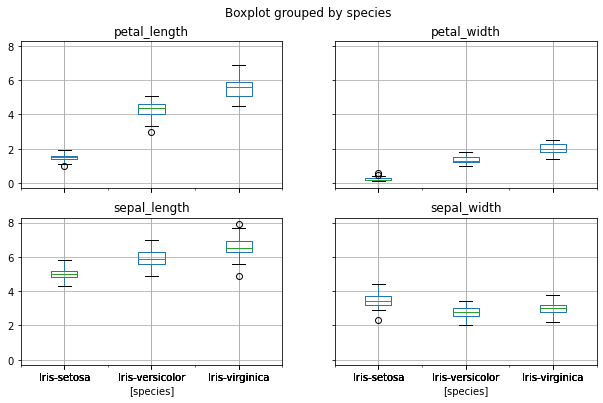

In [50]:
 #Check for outliers using a boxplot, we observe there are outliers for speal_width
dfdata.boxplot(by = "species", figsize = (10,6))
plt.savefig("dashboard_boxplot.png", format="PNG")

In [51]:
#Calculate z-score of features to remove outliers. No issue with code as final column is string, no z-score
for col in list(dfdata.columns):
    col_zscore = col + '_zscore'
    try:
        dfdata[col_zscore] = (dfdata[col] - dfdata[col].mean())/dfdata[col].std(ddof=0)
    except:
        pass

In [52]:
#inspect the dataset
dfdata

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length_zscore,sepal_width_zscore,petal_length_zscore,petal_width_zscore
0,5.1,3.5,1.4,0.2,Iris-setosa,-0.915509,1.019971,-1.357737,-1.335700
1,4.9,3.0,1.4,0.2,Iris-setosa,-1.157560,-0.128082,-1.357737,-1.335700
2,4.7,3.2,1.3,0.2,Iris-setosa,-1.399610,0.331139,-1.414778,-1.335700
3,4.6,3.1,1.5,0.2,Iris-setosa,-1.520635,0.101529,-1.300696,-1.335700
4,5.0,3.6,1.4,0.2,Iris-setosa,-1.036535,1.249582,-1.357737,-1.335700
...,...,...,...,...,...,...,...,...,...
142,6.7,3.0,5.2,2.3,Iris-virginica,1.020892,-0.128082,0.809831,1.444682
143,6.3,2.5,5.0,1.9,Iris-virginica,0.536792,-1.276136,0.695748,0.915085
144,6.5,3.0,5.2,2.0,Iris-virginica,0.778842,-0.128082,0.809831,1.047484
145,6.2,3.4,5.4,2.3,Iris-virginica,0.415766,0.790361,0.923913,1.444682


In [58]:
#check where the outlier lies
outliers = abs(dfdata.iloc[:,5:9]) > float(3)
outliers.any()

sepal_length_zscore    False
sepal_width_zscore      True
petal_length_zscore    False
petal_width_zscore     False
dtype: bool

In [59]:
#check how many outliers are there
outliers.value_counts()

sepal_length_zscore  sepal_width_zscore  petal_length_zscore  petal_width_zscore
False                False               False                False                 146
                     True                False                False                   1
dtype: int64

In [60]:
#iterate through the entire dataframe to remove outlier (test)
#x = []
#counter = 0
#for i in range(len(x)):
#    j = len(x[i])
#    for k in range(j):
#        counter += 1
#        print(counter)
#        if abs(x[i][k]) > 3:
#            print(x[i][k])
#        else:
#            print("None")

In [66]:
dashboard_outlier_sepal_length = dfdata.loc[abs(dfdata["sepal_length_zscore"]) > float(3)]
dashboard_outlier_sepal_width = dfdata.loc[abs(dfdata["sepal_width_zscore"]) > float(3)]
dashboard_outlier_petal_length = dfdata.loc[abs(dfdata["petal_length_zscore"]) > float(3)]
dashboard_outlier_petal_width = dfdata.loc[abs(dfdata["petal_width_zscore"]) > float(3)]

In [78]:
dashboard_outlier_sepal_length.to_csv("dashboard_outlier_sepal_length.csv")

dashboard_outlier_sepal_width.to_csv("dashboard_outlier_sepal_width.csv")

dashboard_outlier_petal_length.to_csv("dashboard_outlier_petal_length.csv")

dashboard_outlier_petal_width.to_csv("dashboard_outlier_petal_width.csv")

In [146]:
#remove outliers
dfdata = dfdata.loc[abs(dfdata["sepal_length_zscore"]) < float(3)]
dfdata = dfdata.loc[abs(dfdata["sepal_width_zscore"]) < float(3)]
dfdata = dfdata.loc[abs(dfdata["petal_length_zscore"]) < float(3)]
dfdata = dfdata.loc[abs(dfdata["petal_width_zscore"]) < float(3)]

In [147]:
#check outliers removed from data, expected number of rows: 147 - 1 = 146
dfdata

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length_zscore,sepal_width_zscore,petal_length_zscore,petal_width_zscore
0,5.1,3.5,1.4,0.2,Iris-setosa,-0.915509,1.019971,-1.357737,-1.335700
1,4.9,3.0,1.4,0.2,Iris-setosa,-1.157560,-0.128082,-1.357737,-1.335700
2,4.7,3.2,1.3,0.2,Iris-setosa,-1.399610,0.331139,-1.414778,-1.335700
3,4.6,3.1,1.5,0.2,Iris-setosa,-1.520635,0.101529,-1.300696,-1.335700
4,5.0,3.6,1.4,0.2,Iris-setosa,-1.036535,1.249582,-1.357737,-1.335700
...,...,...,...,...,...,...,...,...,...
142,6.7,3.0,5.2,2.3,Iris-virginica,1.020892,-0.128082,0.809831,1.444682
143,6.3,2.5,5.0,1.9,Iris-virginica,0.536792,-1.276136,0.695748,0.915085
144,6.5,3.0,5.2,2.0,Iris-virginica,0.778842,-0.128082,0.809831,1.047484
145,6.2,3.4,5.4,2.3,Iris-virginica,0.415766,0.790361,0.923913,1.444682


In [148]:
#remove z-score columns and check its removed, expected number of (rows, columns): (146, 5)
dfdata.drop(dfdata.columns[[5,6,7,8]], axis = 1, inplace = True)
dfdata

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
142,6.7,3.0,5.2,2.3,Iris-virginica
143,6.3,2.5,5.0,1.9,Iris-virginica
144,6.5,3.0,5.2,2.0,Iris-virginica
145,6.2,3.4,5.4,2.3,Iris-virginica


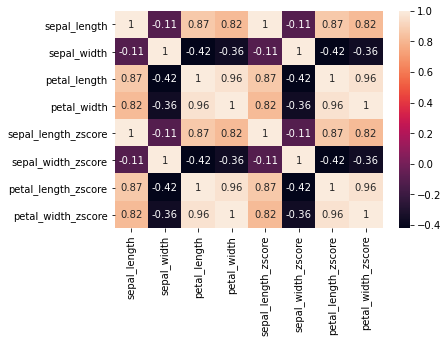

In [82]:
#find relationships between features, e.g petal_length and petal_width are highly correlated
sns.heatmap(dfdata.corr(), annot = True)
plt.savefig("dashboard_correlation_heatmap.png", format="PNG")

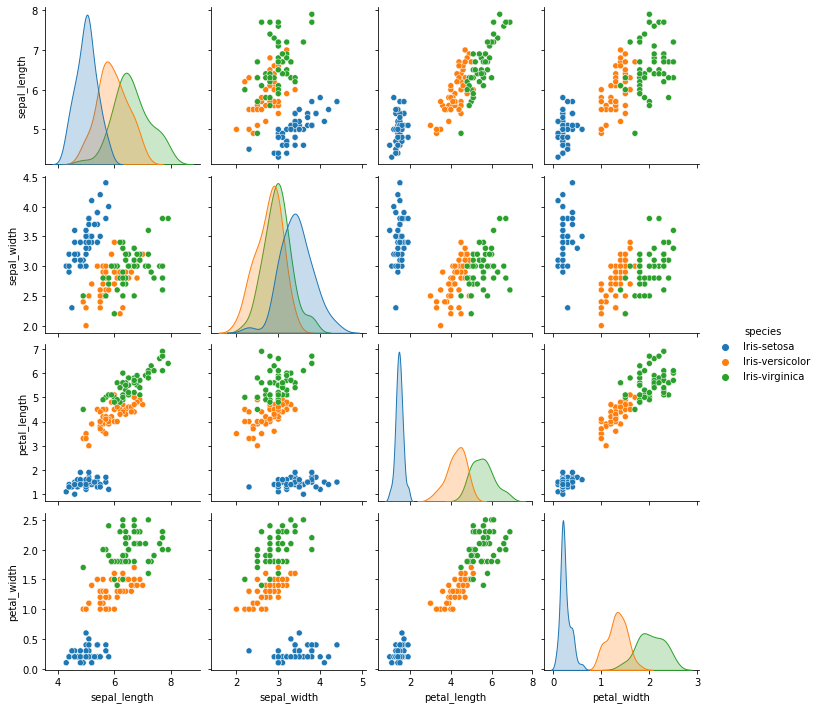

In [86]:
#visualize the relationships via scatterplots and the distribution
sns.pairplot(dfdata[['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']], hue = "species")
plt.savefig("dashboard_scatterplot.png", format="PNG")

In [62]:
#findings
#no correlation between sepal_width and sepal_length
#correlation between sepal_length and petal_length
#correlation between sepal_length and petal_width
#correlation between petal_length and petal_width

In [63]:
#Dataset is small, a correlation plot is enough but if dataset is bigger, need to use shannon entropy aka mutual information to
#find relationship between sets of information (information loss) e.g. if sunny in desert -> no information learnt but if its
#raining in the dessert, its like.... give bigger weight to new information if it happens rarely

In [88]:
#Assign each species to a unique value for classification
dfdata = dfdata.replace(to_replace = ["Iris-setosa", "Iris-versicolor", "Iris-virginica" ], value = ["1", "2", "3"])

In [89]:
#inspect dataset
dfdata

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length_zscore,sepal_width_zscore,petal_length_zscore,petal_width_zscore
0,5.1,3.5,1.4,0.2,1,-0.915509,1.019971,-1.357737,-1.335700
1,4.9,3.0,1.4,0.2,1,-1.157560,-0.128082,-1.357737,-1.335700
2,4.7,3.2,1.3,0.2,1,-1.399610,0.331139,-1.414778,-1.335700
3,4.6,3.1,1.5,0.2,1,-1.520635,0.101529,-1.300696,-1.335700
4,5.0,3.6,1.4,0.2,1,-1.036535,1.249582,-1.357737,-1.335700
...,...,...,...,...,...,...,...,...,...
142,6.7,3.0,5.2,2.3,3,1.020892,-0.128082,0.809831,1.444682
143,6.3,2.5,5.0,1.9,3,0.536792,-1.276136,0.695748,0.915085
144,6.5,3.0,5.2,2.0,3,0.778842,-0.128082,0.809831,1.047484
145,6.2,3.4,5.4,2.3,3,0.415766,0.790361,0.923913,1.444682


In [90]:
#shuffle the dataset to randomize it so as to minimize the likelihood of having a biased dataset
#and increase the chances of having a representative dataset for training.
dfdata = shuffle(dfdata)

In [91]:
#assign the features
X = dfdata.iloc[:, :4].values
X

array([[6.4, 2.8, 5.6, 2.1],
       [4.6, 3.1, 1.5, 0.2],
       [5.8, 4. , 1.2, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5. , 3.4, 1.5, 0.2],
       [5.8, 2.7, 4.1, 1. ],
       [4.4, 3.2, 1.3, 0.2],
       [7.6, 3. , 6.6, 2.1],
       [6.2, 2.9, 4.3, 1.3],
       [6.3, 3.3, 4.7, 1.6],
       [5.7, 2.8, 4.1, 1.3],
       [7.2, 3. , 5.8, 1.6],
       [5.4, 3.7, 1.5, 0.2],
       [6.3, 3.4, 5.6, 2.4],
       [5.3, 3.7, 1.5, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [6.4, 3.2, 5.3, 2.3],
       [5.7, 2.9, 4.2, 1.3],
       [6.5, 3. , 5.8, 2.2],
       [5.2, 3.4, 1.4, 0.2],
       [6.5, 3.2, 5.1, 2. ],
       [4.4, 2.9, 1.4, 0.2],
       [5. , 3.5, 1.3, 0.3],
       [4.4, 3. , 1.3, 0.2],
       [6.7, 3.1, 4.4, 1.4],
       [5.4, 3. , 4.5, 1.5],
       [7.3, 2.9, 6.3, 1.8],
       [6.3, 2.5, 5. , 1.9],
       [6.7, 2.5, 5.8, 1.8],
       [4.6, 3.2, 1.4, 0.2],
       [6.1, 3. , 4.6, 1.4],
       [6.4, 3.2, 4.5, 1.5],
       [6.4, 2.7, 5.3, 1.9],
       [5.1, 3.7, 1.5, 0.4],
       [7.7, 3

In [92]:
#assign what is to be classified
y = dfdata["species"]
y

126    3
3      1
14     1
30     1
7      1
      ..
39     1
27     1
57     2
96     2
81     2
Name: species, Length: 147, dtype: object

In [93]:
one_hot_encoding = LabelEncoder()
one_hot_encoding.fit(y)
y = one_hot_encoding.fit_transform(y)
y = np_utils.to_categorical(y)

In [94]:
#scale data to normalize the features of data as deep learning map input variables to an output variable
sc = StandardScaler()
X = sc.fit_transform(X)

In [95]:
#Split the dataset into training and test sets, 80:20 split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)


In [96]:
#Build a sequential model as petal_length and petal_width, etc tend to grow in a sequence (pattern)
#Use hyparameter tuning to iterate through the layers and step through to find the best weight for each node
#to show i can do hyperparameter tuning
def build_model(hp):
    model = keras.Sequential()
    #model.add(keras.layers.Flatten(input_shape=(28, 28)))
    hp_units = hp.Int('units', min_value = 32, max_value = 512, step = 32)
    model.add(keras.layers.Dense(units = hp_units, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(512, activation = 'relu'))
    model.add(Dropout(0.31))
    model.add(Dense(256, activation = 'relu'))
    model.add(Dropout(0.24))
    model.add(Dense(128, activation = 'relu'))
    model.add(Dropout(0.3))
    model.add(keras.layers.Dense(3, activation = 'softmax')) # this is for multiclass variables
    
    hp_learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4])
    model.compile(optimizer = keras.optimizers.Adam(learning_rate = hp_learning_rate),
                loss = keras.losses.CategoricalCrossentropy(from_logits = True),
                metrics = ['accuracy'])
    
    return model

tuner = kt.Hyperband(
    build_model,
    objective = 'accuracy',
    max_epochs = 100,
    hyperband_iterations= 20,
    overwrite=True)

In [99]:
tuner.search(x_train, y_train, epochs = 50, validation_split = 0.2)

best_hps = tuner.get_best_hyperparameters(num_trials = 1)[0]

Trial 45 Complete [00h 00m 00s]
accuracy: 0.7956989407539368

Best accuracy So Far: 0.8387096524238586
Total elapsed time: 00h 01m 06s
INFO:tensorflow:Oracle triggered exit


In [100]:
print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")


The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 416 and the optimal learning rate for the optimizer
is 0.01.



In [197]:
#Neural Network Model
model = keras.Sequential()
model.add(keras.layers.Dense(4, activation='relu'))
model.add(keras.layers.Dense(7, activation='relu'))
model.add(keras.layers.Dense(3, activation = 'softmax')) # this is for multiclass variables
model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
history = model.fit(x_train, y_train, epochs = 149, batch_size = 4)

Epoch 1/149
30/30 [==============================] - 0s 1ms/step - loss: 0.6076 - accuracy: 0.6154
Epoch 2/149
30/30 [==============================] - 0s 413us/step - loss: 0.5708 - accuracy: 0.5812
Epoch 3/149
30/30 [==============================] - 0s 413us/step - loss: 0.5385 - accuracy: 0.5556
Epoch 4/149
30/30 [==============================] - 0s 413us/step - loss: 0.5066 - accuracy: 0.6068
Epoch 5/149
30/30 [==============================] - 0s 413us/step - loss: 0.4774 - accuracy: 0.6838
Epoch 6/149
30/30 [==============================] - 0s 413us/step - loss: 0.4504 - accuracy: 0.6752
Epoch 7/149
30/30 [==============================] - 0s 447us/step - loss: 0.4241 - accuracy: 0.6752
Epoch 8/149
30/30 [==============================] - 0s 412us/step - loss: 0.4003 - accuracy: 0.6752
Epoch 9/149
30/30 [==============================] - 0s 413us/step - loss: 0.3798 - accuracy: 0.6752
Epoch 10/149
30/30 [==============================] - 0s 414us/step - loss: 0.3614 - accuracy

30/30 [==============================] - 0s 379us/step - loss: 0.0933 - accuracy: 0.9573
Epoch 82/149
30/30 [==============================] - 0s 411us/step - loss: 0.0920 - accuracy: 0.9573
Epoch 83/149
30/30 [==============================] - 0s 413us/step - loss: 0.0897 - accuracy: 0.9658
Epoch 84/149
30/30 [==============================] - 0s 378us/step - loss: 0.0878 - accuracy: 0.9658
Epoch 85/149
30/30 [==============================] - 0s 378us/step - loss: 0.0862 - accuracy: 0.9573
Epoch 86/149
30/30 [==============================] - 0s 377us/step - loss: 0.0837 - accuracy: 0.9744
Epoch 87/149
30/30 [==============================] - 0s 377us/step - loss: 0.0814 - accuracy: 0.9829
Epoch 88/149
30/30 [==============================] - 0s 344us/step - loss: 0.0800 - accuracy: 0.9658
Epoch 89/149
30/30 [==============================] - 0s 379us/step - loss: 0.0785 - accuracy: 0.9829
Epoch 90/149
30/30 [==============================] - 0s 379us/step - loss: 0.0767 - accuracy: 

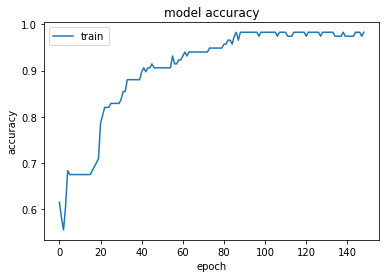

In [200]:
#graph of model accuracy against number of times the dataset is ran through (epoch)
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.savefig("dashboard_model_accuracy.png", format="PNG")
plt.show()

In [ ]:
#How to imporve, use one hot encoding to assign class to species
#one_hot_encoding = LabelEncoder()
#one_hot_encoding.fit(y)
#y = one_hot_encoding.fit_transform(y)
#y = np_utils.to_categorical(y)

#get more data

In [151]:
#prompt user for input
def user_input():
    while True:
        print("Enter the details of the new flower you wish to predict")
        try:
            a = float(input("Enter sepal_length: "))
            break
        except:
            print("Please Input a Number")
            pass
    while True:
        try:
            b = float(input("Enter sepal_width: "))
            break
        except:
            print("Please Input a Number")
            pass
    while True:
        try:
            c = float(input("Enter petal_length: "))
            break
        except:
            print("Please Input a Number")
            pass
    while True:
        try:
            d = float(input("Enter petal_width: "))
            break
        except:
            print("Please Input a Number")
            pass
    while True:
        try:
            e = str(input("Enter the Species (setosa, versicolor, virginica) excluding Iris-")).lower()
            if e == "setosa":
                e = 1
                break
            elif e == "versicolor":
                e = 2
                break
            elif e == "virginica":
                e = 3
                break
            else:
                print("Try Again")
                pass
        except:
            pass
    return (a, b, c, d, e)
#can use a dictionary to do as well for species

In [152]:
data = user_input()
data

Enter the details of the new flower you wish to predict
Enter sepal_length: 3
Enter sepal_width: 3
Enter petal_length: 3
Enter petal_width: 3
Enter the Species (setosa, versicolor, virginica) excluding Iris-setosa


(3.0, 3.0, 3.0, 3.0, 1)

In [153]:
#creating a dataframe to store the user's input
dfdata2 = pd.DataFrame([data], columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"])
#check dataframe
dfdata2

,sepal_length,sepal_width,petal_length,petal_width,species
0,3.0,3.0,3.0,3.0,1


In [154]:
#combine with the original dataframe
dfdata3 = pd.concat([dfdata, dfdata2], ignore_index = True)
#inspect dataframe
dfdata3

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length_zscore,sepal_width_zscore,petal_length_zscore,petal_width_zscore
0,6.4,2.8,5.6,2.1,3,0.657817,-0.587304,1.037996,1.179883
1,4.6,3.1,1.5,0.2,1,-1.520635,0.101529,-1.300696,-1.335700
2,5.8,4.0,1.2,0.2,1,-0.068334,2.168025,-1.471819,-1.335700
3,4.8,3.1,1.6,0.2,1,-1.278585,0.101529,-1.243654,-1.335700
4,5.0,3.4,1.5,0.2,1,-1.036535,0.790361,-1.300696,-1.335700
...,...,...,...,...,...,...,...,...,...
143,5.2,3.5,1.5,0.2,1,-0.794484,1.019971,-1.300696,-1.335700
144,5.2,2.7,3.9,1.4,2,-0.794484,-0.816914,0.068294,0.253089
145,5.1,2.5,3.0,1.1,2,-0.915509,-1.276136,-0.445077,-0.144108
146,6.0,2.7,5.1,1.6,2,0.173716,-0.816914,0.752789,0.517888


In [155]:
#clear the dataframe to prevent duplicated entries when user makes a new input
dfdata2 = dfdata2.drop(dfdata2.index)
dfdata2

,sepal_length,sepal_width,petal_length,petal_width,species


In [166]:
#calculate z-score of features to remove outliers. No issue with code as final column is string, no z-score
#using the new input as the new focal point, "mean", to get the z-score
try:
    for col in list(dfdata3.columns):
        col_zscore = col + '_zscore'
        dfdata3[col_zscore] = (dfdata3[col] - dfdata3[col][-1:].mean())/dfdata3[col].std(ddof=0)
except:
    pass

In [167]:
#inspect dataframe
dfdata3

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length_zscore,sepal_width_zscore,petal_length_zscore,petal_width_zscore,sum_of_zscore
0,6.4,2.8,5.6,2.1,3,3.971584,-0.460755,1.487113,-1.173549,7.093002
1,4.6,3.1,1.5,0.2,1,1.868981,0.230378,-0.857950,-3.651042,6.608350
2,5.8,4.0,1.2,0.2,1,3.270716,2.303776,-1.029540,-3.651042,10.255074
3,4.8,3.1,1.6,0.2,1,2.102603,0.230378,-0.800753,-3.651042,6.784776
4,5.0,3.4,1.5,0.2,1,2.336226,0.921510,-0.857950,-3.651042,7.766728
...,...,...,...,...,...,...,...,...,...,...
143,5.2,3.5,1.5,0.2,1,2.569848,1.151888,-0.857950,-3.651042,8.230728
144,5.2,2.7,3.9,1.4,2,2.569848,-0.691133,0.514770,-2.086310,5.862061
145,5.1,2.5,3.0,1.1,2,2.453037,-1.151888,0.000000,-2.477493,6.082418
146,6.0,2.7,5.1,1.6,2,3.504339,-0.691133,1.201130,-1.825521,7.222123


In [158]:
#z-score measure the distance of any data point from the mean in units of standard deviations they are useful because they 
#allow us to compare the relative positions of data values in different samples by standardizing 2 or more normal distributions
#Therefore, we’ll be able to compare relative positions of data values to determine which data values are closer to or 
#farther from the mean
#by replacing the mean with the user input, we can find the relative positions of data points around the user's input
#hence with an input of 0, it means the data point score is identical to the mean score
#sum the absolute value of z-scores of each datapoint. The new input should give a value of 0
dfdata3["sum_of_zscore"] = abs(dfdata3["sepal_length_zscore"]) + abs(dfdata3["sepal_width_zscore"]) + abs(dfdata3["petal_length_zscore"]) + abs(dfdata3["petal_width_zscore"])
#check if expected output is obtained
dfdata3["sum_of_zscore"].sort_values()

147     0.000000
25      5.617336
133     5.714968
106     5.827355
60      5.850959
         ...    
44     10.251002
2      10.255074
79     10.492583
15     10.627395
107    10.815405
Name: sum_of_zscore, Length: 148, dtype: float64

In [159]:
#sort the dataframe in ascending order using values in the column - sum_of_zscore
sorted_data = dfdata3.sort_values("sum_of_zscore")
#inspect dataframe
sorted_data

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length_zscore,sepal_width_zscore,petal_length_zscore,petal_width_zscore,sum_of_zscore
147,3.0,3.0,3.0,3.0,1,0.000000,0.000000,0.000000,0.000000,0.000000
25,5.4,3.0,4.5,1.5,2,2.803471,0.000000,0.857950,-1.955915,5.617336
133,5.8,2.8,5.1,2.4,3,3.270716,-0.460755,1.201130,-0.782366,5.714968
106,5.6,2.9,3.6,1.3,2,3.037094,-0.230378,0.343180,-2.216704,5.827355
60,5.6,3.0,4.5,1.5,2,3.037094,0.000000,0.857950,-1.955915,5.850959
...,...,...,...,...,...,...,...,...,...,...
44,5.5,4.2,1.4,0.2,1,2.920282,2.764531,-0.915147,-3.651042,10.251002
2,5.8,4.0,1.2,0.2,1,3.270716,2.303776,-1.029540,-3.651042,10.255074
79,7.7,3.8,6.7,2.2,3,5.490131,1.843021,2.116277,-1.043155,10.492583
15,5.7,4.4,1.5,0.4,1,3.153905,3.225287,-0.857950,-3.390253,10.627395


In [201]:
#get the top 10 datapoints that is closest to the user input according to sum_of_zscore
#these top 10 datapoints are the 10 most similar datapoints in the existing Iris data, to the inputted arguments of the program
sorted_data.head(11)

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length_zscore,sepal_width_zscore,petal_length_zscore,petal_width_zscore,sum_of_zscore
147,3.0,3.0,3.0,3.0,1,0.000000,0.000000,0.000000,0.000000,0.000000
25,5.4,3.0,4.5,1.5,2,2.803471,0.000000,0.857950,-1.955915,5.617336
133,5.8,2.8,5.1,2.4,3,3.270716,-0.460755,1.201130,-0.782366,5.714968
106,5.6,2.9,3.6,1.3,2,3.037094,-0.230378,0.343180,-2.216704,5.827355
60,5.6,3.0,4.5,1.5,2,3.037094,0.000000,0.857950,-1.955915,5.850959
144,5.2,2.7,3.9,1.4,2,2.569848,-0.691133,0.514770,-2.086310,5.862061
96,5.6,3.0,4.1,1.3,2,3.037094,0.000000,0.629163,-2.216704,5.882961
139,5.6,2.8,4.9,2.0,3,3.037094,-0.460755,1.086737,-1.303944,5.888529
108,4.9,2.5,4.5,1.7,3,2.219415,-1.151888,0.857950,-1.695127,5.924379
98,5.9,3.0,4.2,1.5,2,3.387527,0.000000,0.686360,-1.955915,6.029803


In [202]:
sorted_data.head(11).to_csv("dashboard_closest_10.csv", encoding = "utf-8")